In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from cvxopt import matrix
from cvxopt import solvers
from numpy.linalg import norm

In [4]:
x1 = np.random.uniform(0,1,(1,100))
x2 = np.random.uniform(0,1,(1,100))
x = np.concatenate((x1,x2),axis=0)
print (x)

[[0.60470103 0.82021292 0.74021697 0.37512203 0.867356   0.66763491
  0.54805668 0.73936557 0.30571887 0.54199157 0.99226408 0.79367059
  0.86017308 0.85736239 0.49349573 0.9616694  0.2361775  0.9849941
  0.68902926 0.12654413 0.80592535 0.28421693 0.9366388  0.26546876
  0.7461679  0.15709626 0.87728702 0.64444767 0.96728478 0.76828664
  0.99878558 0.32116768 0.70029098 0.19930267 0.17350801 0.78529905
  0.08134316 0.44649707 0.10740306 0.22511278 0.16129731 0.74865184
  0.84646396 0.48630394 0.54030874 0.36425636 0.37608045 0.03057869
  0.45719446 0.18837039 0.19375123 0.19259103 0.18236107 0.92727227
  0.53504631 0.35737119 0.92393559 0.49597104 0.71374619 0.16281788
  0.62434302 0.43412268 0.26675607 0.62941315 0.05186218 0.59650462
  0.05517243 0.39068541 0.45636675 0.03220594 0.66739246 0.60756462
  0.752984   0.55924007 0.89485784 0.50468789 0.71932117 0.5942252
  0.80643285 0.25597195 0.87863282 0.64168908 0.46958186 0.7582554
  0.20271546 0.26205643 0.65765689 0.8279775  0.181

In [5]:
d = np.empty([100,1])
positive = []
negative = []
for i in range(0,100):
    if(x[1,i]<((1/5)*np.sin(10*x[0,i])+0.3) or ((x[1,i]-0.8,2)**2 +(x[0,i]-0.5,2)**2)<(0.15*0.15)):
        d[i]=1.0
        pos.append(x[:,i])
    else:
        d[i]=-1.0
        neg.append(x[:,i])
positive = np.asarray(positive)
negative = np.asarray(negative)

Here, the blue crosses represent d= the  in the sun and mountain region and red

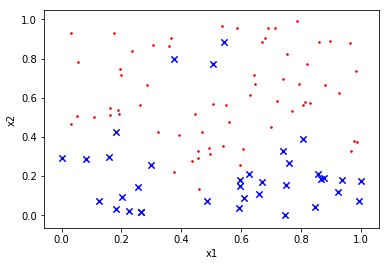

In [17]:
plt.scatter(positive[:,0], positive[:,1], label= "cross", color= "blue",  
            marker= "x", s= 40)
plt.scatter(negative[:,0], negative[:,1], label= "dot", color= "red",  
            marker= ".", s= 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

The data in this problem in not linearly seperable. to seperate classes C1 and C-1 (positive and negative in the code), gaussian kernel seems to be the appropriate choice. Why?

In [7]:
P = np.zeros([100,100])
for i in range(0,100):
    for j in range(0,100):
        P[i][j] = d[i]*d[j]*math.exp(-((x[0,i]-x[0,j])*(x[0,i]-x[0,j])+((x[1,i]-x[1,j])*(x[1,i]-x[1,j])))/2)
print(P)

[[ 1.          0.88842588  0.92879144 ...  0.85037513  0.82670554
  -0.95509849]
 [ 0.88842588  1.          0.99390161 ...  0.98213559  0.95721174
  -0.74135734]
 [ 0.92879144  0.99390161  1.         ...  0.97751872  0.95608755
  -0.79405481]
 ...
 [ 0.85037513  0.98213559  0.97751872 ...  1.          0.99421175
  -0.68390165]
 [ 0.82670554  0.95721174  0.95608755 ...  0.99421175  1.
  -0.65526569]
 [-0.95509849 -0.74135734 -0.79405481 ... -0.68390165 -0.65526569
   1.        ]]


In [7]:
P = np.zeros([100,100])
for i in range(0,100):
    for j in range(0,100):
        P[i][j] = d[i]*d[j]*math.exp(-((x[0,i]-x[0,j])*(x[0,i]-x[0,j])+((x[1,i]-x[1,j])*(x[1,i]-x[1,j])))/2)
print(P)

[[ 1.          0.88842588  0.92879144 ...  0.85037513  0.82670554
  -0.95509849]
 [ 0.88842588  1.          0.99390161 ...  0.98213559  0.95721174
  -0.74135734]
 [ 0.92879144  0.99390161  1.         ...  0.97751872  0.95608755
  -0.79405481]
 ...
 [ 0.85037513  0.98213559  0.97751872 ...  1.          0.99421175
  -0.68390165]
 [ 0.82670554  0.95721174  0.95608755 ...  0.99421175  1.
  -0.65526569]
 [-0.95509849 -0.74135734 -0.79405481 ... -0.68390165 -0.65526569
   1.        ]]


In [8]:
P = matrix(P)
q = matrix(-np.ones([100,1]),(100,1),'d')
G = matrix(-np.identity(100))
h = matrix(np.zeros([100,1]),(100,1),'d')
d2 = np.reshape(d,(1,100))
A = matrix(d2)
b = matrix(0,(1,1),'d')
sol = solvers.qp(P,q,G,h,A,b)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -5.1200e+01 -1.6869e+02  4e+02  1e+01  3e+00
 1: -2.1235e+02 -3.8138e+02  2e+02  6e+00  2e+00
 2: -6.5791e+02 -8.2096e+02  2e+02  4e+00  1e+00
 3: -1.7484e+03 -2.0390e+03  3e+02  4e+00  1e+00
 4: -7.7421e+03 -8.4158e+03  7e+02  4e+00  1e+00
 5: -1.6165e+04 -1.7341e+04  1e+03  4e+00  1e+00
 6: -8.2270e+04 -8.8700e+04  6e+03  4e+00  1e+00
 7: -1.4143e+05 -1.5303e+05  1e+04  4e+00  1e+00
 8: -2.4851e+05 -2.7201e+05  2e+04  4e+00  1e+00
 9: -5.2712e+05 -5.9896e+05  7e+04  3e+00  1e+00
10: -9.1341e+05 -1.0818e+06  2e+05  3e+00  9e-01
11: -1.6424e+06 -2.0358e+06  4e+05  2e+00  5e-01
12: -1.9124e+06 -2.0718e+06  2e+05  4e-01  1e-01
13: -1.9201e+06 -1.9403e+06  2e+04  1e-02  3e-03
14: -1.9307e+06 -1.9313e+06  6e+02  2e-04  7e-05
15: -1.9310e+06 -1.9310e+06  7e+00  3e-06  7e-07
16: -1.9310e+06 -1.9310e+06  7e-02  3e-08  7e-09
Optimal solution found.
[ 3.52e-04]
[ 2.17e-05]
[ 6.78e-05]
[ 4.52e+05]
[ 2.54e-05]
[ 7.07e-05]
[ 1.14e-03]
[ 2.15e-04]

[[451755.93228736]
 [ 48021.53430381]
 [509373.52525441]
 [194625.06140733]
 [ 62747.80144829]
 [273362.36876216]
 [318691.91445979]
 [202055.78632146]
 [ 61860.36992534]
 [653174.08962742]
 [ 37043.71613254]
 [780578.55801769]
 [268640.50531861]]


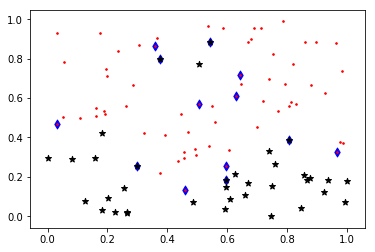

In [18]:
alpha = np.array(sol['x'])
s_v = []
d_sv = []
sv_a = []
for i in range(0,100):
    if(alpha[i]>=math.pow(10,3)):
        sv_a.append(alpha[i])
        s_v.append(x[:,i])
        d_sv.append(d[i])
s_v = np.asarray(s_v)
d_sv = np.asarray(d_sv)
sv_a = np.asarray(sv_a)
print(sv_a)
plt.scatter(s_v[:,0], s_v[:,1], label= "cross", color= "blue", marker= "d", s= 40)
plt.scatter(positive[:,0], positive[:,1], label= "star", color= "black", marker= "*", s= 40)
plt.scatter(negative[:,0], negative[:,1], label= "dot", color= "red",  marker= ".", s= 10)
plt.show()

In [10]:
theta = 0
for i in range(0,len(s_v)):
    theta = theta + (sv_a[i]*d_sv[i]*math.exp(-(math.pow(norm(s_v[i]-s_v[1]),2))/2))                     
theta = d_sv[1]-theta
print(theta)

[-481.16443029]


In [11]:
w = np.zeros([len(s_v),1]) 
gx = []
for i in range(0,len(s_v)):
    for j in range(0,len(s_v)):
        w[i] = w[i]+(sv_a[j]*d_sv[j]*math.exp(-(math.pow(norm(s_v[j]-s_v[i]),2))/2))
    gx.append(w[i]+theta)
gx = np.asarray(gx)
print(gx)

[[ 0.99996061]
 [ 1.        ]
 [ 0.99944488]
 [-1.00122056]
 [-1.00135097]
 [-1.00136274]
 [-1.00016776]
 [-0.99985614]
 [-0.99989745]
 [ 0.99891363]
 [-0.99983711]
 [-1.00076042]
 [ 0.99893776]]


In [12]:
gx1 = np.zeros([100,100])
x1 = np.linspace(0,1,100)
x2 = np.linspace(0,1,100)
for i in range(len(x1)):
    for j in range(len(x2)):
        temp = 0
        for k in range(100):
            temp = temp + (alpha[k]*d[k]*math.exp(-(math.pow(norm(x[:,k]-np.asarray([x1[i],x2[j]])),2))/2))
        gx1[i][j] = temp + theta
print(gx1)           

[[ 62.34520979  61.71867121  61.08803046 ... -82.28387004 -83.31512781
  -84.35459758]
 [ 61.34621489  60.72832032  60.1064316  ... -80.50128314 -81.52018598
  -82.54739559]
 [ 60.34659685  59.73725203  59.12402038 ... -78.74155536 -79.74816765
  -80.76318036]
 ...
 [ 30.94355384  30.47045952  29.99403126 ... -79.67848423 -80.46560486
  -81.25903322]
 [ 30.73419867  30.25767034  29.7777482  ... -81.28478846 -82.07774542
  -82.87693502]
 [ 30.50070801  30.02074511  29.53732892 ... -82.91014353 -83.7088936
  -84.51380112]]


In [13]:
p = []
q = []
r = []
for i in range(100):
    for j in range(100):
        if(gx1[i][j]>-1.1 and gx1[i][j]<-0.9):
            #print("-1")
            p.append(np.asarray([x1[i],x2[j]]))
        if(gx1[i][j]>-0.1 and gx1[i][j]<0.1):
            #print("0")
            q.append(np.asarray([x1[i],x2[j]]))
        if(gx1[i][j]>0.9 and gx1[i][j]<1.1):
            #print("1")
            r.append(np.asarray([x1[i],x2[j]]))
print (p)
print (q)
print (r)



[array([0.00502513, 0.46231156]), array([0.02512563, 0.46733668]), array([0.03015075, 0.46733668]), array([0.04522613, 0.47236181]), array([0.05025126, 0.47236181]), array([0.07035176, 0.47738693]), array([0.07537688, 0.47738693]), array([0.08040201, 0.47738693]), array([0.10050251, 0.48241206]), array([0.10552764, 0.48241206]), array([0.11055276, 0.48241206]), array([0.11557789, 0.48241206]), array([0.12060302, 0.48241206]), array([0.17085427, 0.48241206]), array([0.1758794 , 0.48241206]), array([0.18090452, 0.48241206]), array([0.18592965, 0.48241206]), array([0.19095477, 0.48241206]), array([0.1959799 , 0.48241206]), array([0.20100503, 0.47738693]), array([0.20100503, 0.48241206]), array([0.20603015, 0.47738693]), array([0.21105528, 0.47236181]), array([0.21105528, 0.47738693]), array([0.2160804 , 0.47236181]), array([0.2160804 , 0.47738693]), array([0.22110553, 0.46733668]), array([0.22110553, 0.47236181]), array([0.22613065, 0.46733668]), array([0.22613065, 0.47236181]), array([0.

[array([0.01507538, 0.45728643]), array([0.0201005 , 0.45728643]), array([0.04020101, 0.46231156]), array([0.04522613, 0.46231156]), array([0.05025126, 0.46231156]), array([0.07537688, 0.46733668]), array([0.08040201, 0.46733668]), array([0.08542714, 0.46733668]), array([0.09045226, 0.46733668]), array([0.09547739, 0.46733668]), array([0.10050251, 0.46733668]), array([0.10552764, 0.46733668]), array([0.11055276, 0.46733668]), array([0.11557789, 0.46733668]), array([0.12060302, 0.46733668]), array([0.12562814, 0.46733668]), array([0.13065327, 0.46733668]), array([0.13567839, 0.46733668]), array([0.14070352, 0.46733668]), array([0.14572864, 0.46733668]), array([0.15075377, 0.46733668]), array([0.15577889, 0.46733668]), array([0.16582915, 0.46231156]), array([0.17085427, 0.46231156]), array([0.1758794 , 0.46231156]), array([0.18090452, 0.45728643]), array([0.18592965, 0.45728643]), array([0.19095477, 0.45226131]), array([0.1959799 , 0.45226131]), array([0.20100503, 0.44723618]), array([0.

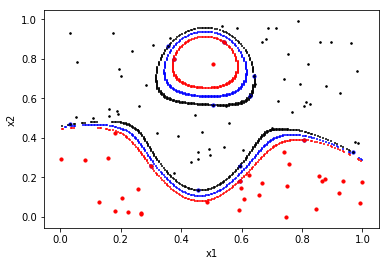

In [15]:
p = np.array(p)
q = np.array(q)
r = np.array(r)

plt.scatter(p[:,0], p[:,1], label= "hline", color= "black",  marker= "_", s= 4)
plt.scatter(q[:,0], q[:,1], label= "hline", color= "blue",  marker= "_", s= 4)
plt.scatter(r[:,0],r[:,1], label= "hline", color= "red", marker= "_", s= 4)
plt.scatter(s_v[:,0], s_v[:,1], label= "cross", color= "blue",  
            marker= ".", s= 40)
plt.scatter(pos[:,0], pos[:,1], label= "cross", color= "red",  
            marker= ".", s= 40)
plt.scatter(neg[:,0], neg[:,1], label= "dot", color= "black",  
            marker= ".", s= 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()